In [18]:
%load_ext autoreload
%autoreload 2

import os
from Bio import PDB
import numpy as np
import pandas as pd
from pathlib import Path
import py3Dmol
import warnings
import Bio
from Bio.PDB import PDBParser, Superimposer

from benchmark import visualize_structure_alignment, plot_with_error

warnings.simplefilter("ignore", Bio.PDB.PDBExceptions.PDBConstructionWarning)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
def compute_rmsd(pdb_path_1: str, pdb_path_2: str, model_index: int = 0) -> float:
    """
    Compute the RMSD between two PDB files based on their CA atoms.

    Args:
        pdb_path_1 (str): Path to first PDB file.
        pdb_path_2 (str): Path to second PDB file.
        model_index (int): Index of the model to use if multiple models are present.

    Returns:
        float: RMSD value.
    """
    parser = PDBParser(QUIET=False)

    structure1 = parser.get_structure("structure1", pdb_path_1)
    structure2 = parser.get_structure("structure2", pdb_path_2)

    atoms1 = []
    atoms2 = []

    for res1, res2 in zip(
        structure1[model_index].get_residues(), structure2[model_index].get_residues()
    ):
        if res1.has_id("CA") and res2.has_id("CA"):
            atoms1.append(res1["CA"])
            atoms2.append(res2["CA"])

    if len(atoms1) != len(atoms2):
        raise ValueError(f"Residue mismatch: {len(atoms1)} != {len(atoms2)}")

    sup = Superimposer()
    sup.set_atoms(atoms1, atoms2)
    return sup.rms


compute_rmsd(
    "./data/bio2token_casp/T1104-D1_bio2token.pdb",
    "./data/casp15_targets_TSdomains_4invitees/T1104-D1.pdb",
)


np.float64(0.7375210365317113)

In [55]:
truth_dir = "data/casp15_targets_TSdomains_4invitees"
pred_dirs = [
    # "data/casp15_targets_TSdomains_4invitees",
    "data/bio2token_casp",
    "data/foldtoken_level5_casp",
    "data/foldtoken_level6_casp",
    "data/foldtoken_level7_casp",
    "data/foldtoken_level8_casp",
    "data/foldtoken_level9_casp",
    "data/foldtoken_level10_casp",
    "data/foldtoken_level12_casp",
]

parser = PDB.PDBParser()
truth_files = [f.split(".")[0] for f in os.listdir(truth_dir) if f.endswith(".pdb")]
truth_files.sort()

all_results = {}
for pred_dir in pred_dirs:
    pred_files = [f.split(".")[0] for f in os.listdir(pred_dir) if f.endswith(".pdb")]
    pred_files.sort()

    model_name = os.path.basename(pred_dir).replace("_casp", "")
    for truth_file, pred_file in zip(truth_files, pred_files):
        if truth_file.split(".")[0] != pred_file.split("_")[0]:
            raise ValueError(
                f"Truth file {truth_file} does not match prediction file {pred_file}"
            )
        else:
            target = truth_file.split(".")[0]
        try:
            rmsd = compute_rmsd(
                os.path.join(pred_dir, pred_file + ".pdb"),
                os.path.join(truth_dir, truth_file + ".pdb"),
            )
        except Exception as e:
            print(f"Error in RMSD calculation: {e}")
            rmsd = None

        if target not in all_results:
            all_results[target] = {}
        all_results[target][f"{model_name}_RMSD"] = rmsd

df = pd.DataFrame.from_dict(all_results, orient="index")
display(df)

Error in RMSD calculation: Residue mismatch: structure1 has 147 residues, structure2 has 148 residues
Error in RMSD calculation: Residue mismatch: structure1 has 113 residues, structure2 has 115 residues
Error in RMSD calculation: Residue mismatch: structure1 has 139 residues, structure2 has 141 residues
Error in RMSD calculation: Residue mismatch: structure1 has 149 residues, structure2 has 150 residues
Error in RMSD calculation: Residue mismatch: structure1 has 47 residues, structure2 has 48 residues
Error in RMSD calculation: Residue mismatch: structure1 has 47 residues, structure2 has 48 residues
Error in RMSD calculation: Residue mismatch: structure1 has 47 residues, structure2 has 48 residues
Error in RMSD calculation: Residue mismatch: structure1 has 47 residues, structure2 has 48 residues
Error in RMSD calculation: Residue mismatch: structure1 has 47 residues, structure2 has 48 residues
Error in RMSD calculation: Residue mismatch: structure1 has 47 residues, structure2 has 48 r

,bio2token_RMSD,foldtoken_level5_RMSD,foldtoken_level6_RMSD,foldtoken_level7_RMSD,foldtoken_level8_RMSD,foldtoken_level9_RMSD,foldtoken_level10_RMSD,foldtoken_level12_RMSD
T1104-D1,0.737521,1.603654,1.380800,1.298154,0.966320,0.857345,0.820845,0.711739
T1106s1-D1,0.894732,2.235067,1.576464,1.694806,1.320534,1.098733,0.930388,1.077418
T1106s2-D1,0.724124,1.421836,1.411146,0.868377,0.822946,0.986992,0.912395,0.716482
T1109-D1,0.706411,2.772142,1.440362,1.801300,1.262320,1.122182,1.129094,1.081476
T1110-D1,0.684899,2.653970,2.027106,1.340347,1.325064,1.114246,1.369690,1.070269
T1112-D1,0.903431,4.641957,2.974979,2.605774,2.724899,2.286424,2.518600,2.502462
T1113-D1,0.883217,3.718407,2.969302,3.133844,3.135323,2.114748,2.257757,2.559514
T1114s1-D1,0.952594,0.968053,1.032799,1.075391,1.693519,1.922422,1.195107,1.469920
T1114s2-D1,0.815802,3.899639,3.332826,2.496847,2.011913,1.804377,1.621344,1.636948
T1114s3-D1,0.858504,3.279127,2.488172,1.913892,1.589001,1.534294,1.278400,1.339736


In [67]:
df.columns = ['bio2token', 'foldtoken 32', 'foldtoken 64', 'foldtoken 128', 'foldtoken 256', 'foldtoken 512', 'foldtoken 1024', 'foldtoken 4096']


df.to_csv("./data/bio2token_casp_rmsd_results.csv", index=True)

---

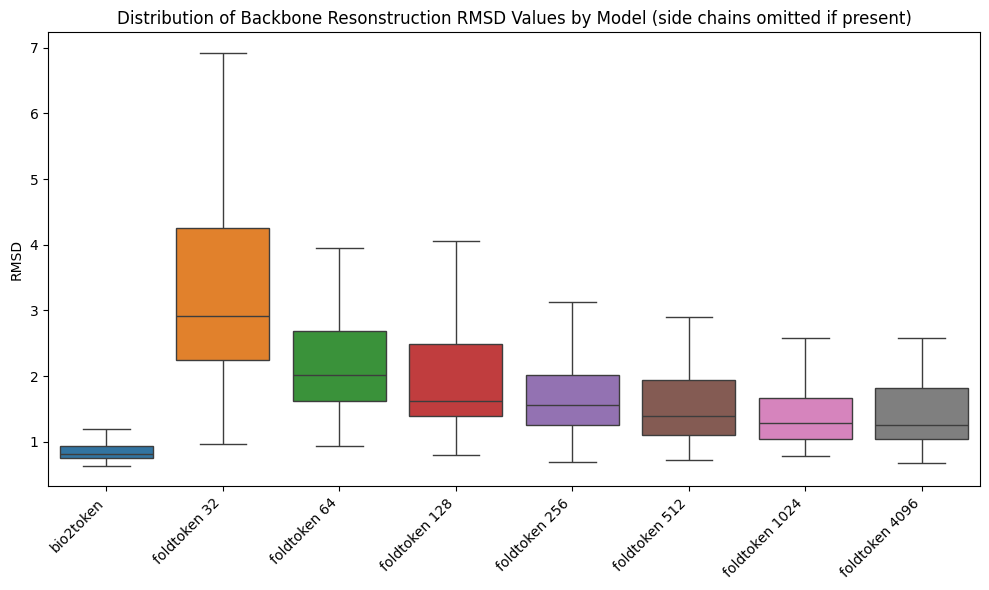

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.dropna(how="any"), showfliers=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSD")
plt.title(
    "Distribution of Backbone Resonstruction RMSD Values by Model (side chains omitted if present)"
)
plt.tight_layout()
plt.show()


In [66]:
df.describe().to_csv("./data/bio2token_casp_rmsd_results_description.csv", index=True)